

# **WELCOME TO NETFLIX USERBASE DATA ANALYSIS**

Let's start by loading the dataset and having a look at the first few rows to get an understanding of its structure.

The dataset provides the following columns:

User ID: A unique identifier for each user.

Subscription Type: The type of subscription a user has (Basic, Standard, or Premium).

Monthly Revenue: The revenue generated from a user's subscription every month.

Join Date: The date the user joined Netflix.

Last Payment Date: The last date the user made a payment.

Country: The country in which the user is located.

Age: The age of the user.

Gender: The gender of the user.

Device: The primary device used by the user to access Netflix.

Plan Duration: The duration of the subscription plan (looks like it's set to "1 Month" for the rows displayed).

First of all, we are going to get a brief summary of the dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Taking a look at datasets:
Load the dataset :

In [3]:
df = pd.read_csv('/content/drive/MyDrive/INTERNSHIP: Python with Machine Learning/Netflix Userbase.csv')
print(df)

      User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

             Country  Age  Gender      

In [ ]:
df.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


Display the last few rows of dataset :

In [ ]:
df.tail(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2490,2491,Premium,13,18-07-22,11-07-23,France,41,Female,Smartphone,1 Month
2491,2492,Basic,14,19-07-22,12-07-23,Brazil,29,Female,Laptop,1 Month
2492,2493,Standard,11,20-07-22,11-07-23,Mexico,33,Male,Smart TV,1 Month
2493,2494,Premium,12,21-07-22,15-07-23,Spain,36,Male,Smart TV,1 Month
2494,2495,Basic,15,23-07-22,12-07-23,Italy,43,Female,Laptop,1 Month
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


Display the size of the dataset :

In [ ]:
df.size

25000

Display the columns of the dataset

In [ ]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

Display the datatpyes of the columns in datasets:

In [ ]:
df.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

Dataset shape in (rows,columns):

In [ ]:
df.shape

(2500, 10)

Getting information about dataset :

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


Find duplicates, If present remove it :

In [ ]:
df.duplicated

<bound method DataFrame.duplicated of       User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

 

In [ ]:
print(df.duplicated().any())

False


Get overall statistics:

In [ ]:
df[['Monthly Revenue','Age']].describe()

,Monthly Revenue,Age
count,2500.000000,2500.000000
mean,12.508400,38.795600
std,1.686851,7.171778
min,10.000000,26.000000
25%,11.000000,32.000000
50%,12.000000,39.000000
75%,14.000000,45.000000
max,15.000000,51.000000


Check number of unique values in data

In [ ]:
df.nunique()

User ID                  2500
Subscription Type           3
Monthly Revenue             6
Join Date                 300
Last Payment Date          26
Country                    10
Age                        26
Gender                      2
Device                      4
Plan Duration               1
Age Group                   4
Subscription Duration     307
dtype: int64

The most frequent subscribers age :

In [ ]:
df['Age'].value_counts().idxmax()

39

The number of subscribers in each Subscription Type:

In [ ]:
df['Subscription Type'].value_counts()

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64

Each device count:

In [ ]:
df['Device'].value_counts()

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

The number of subscribers of both genders(Male, Female):


In [ ]:
df['Gender'].value_counts()

Female    1257
Male      1243
Name: Gender, dtype: int64

The country with the most subscribers:

In [ ]:
df['Country'].value_counts().idxmax()

'United States'

The country with the least number of subscribers:

In [ ]:
df['Country'].value_counts().idxmin()

'United Kingdom'

The last subscription date:

In [ ]:
df['Join Date'].max()

Timestamp('2023-06-14 00:00:00')

The first subscription date:


In [ ]:
df['Join Date'].min()

Timestamp('2021-09-05 00:00:00')

The most device is used:

In [ ]:
df['Device'].value_counts().idxmax()

'Laptop'

### Check Null Values

In [ ]:
df.isnull()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False,False,False


In [ ]:
df1.isnull()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

# Visualize

### Given the dataset's contents, there are several analyses we can perform:

Demographic Analysis: Understand the distribution of users by age, gender, and country.

Subscription Analysis: Analyze the distribution of subscription types, the most popular subscription type, and revenue generated from each type.

Device Analysis: Determine the most commonly used devices and how they vary across countries or age groups.

Activity Analysis: Based on the join date and last payment date, we can determine user retention, average subscription length, and potentially identify churned users.

Revenue Analysis: Calculate total monthly revenue, revenue by country, and average revenue per user.

Geo Analysis: Understand the spatial patterns and relationships in geographic data.

##Performing Demographic Analysis based on three characteristics:

1. Age Distribution: A histogram to understand the age distribution of users.

2. Gender Distribution: A pie chart to show the proportion of male and female users.

3. Country Distribution: A bar chart to display the number of users from each country.

### 1. Age Distribution:

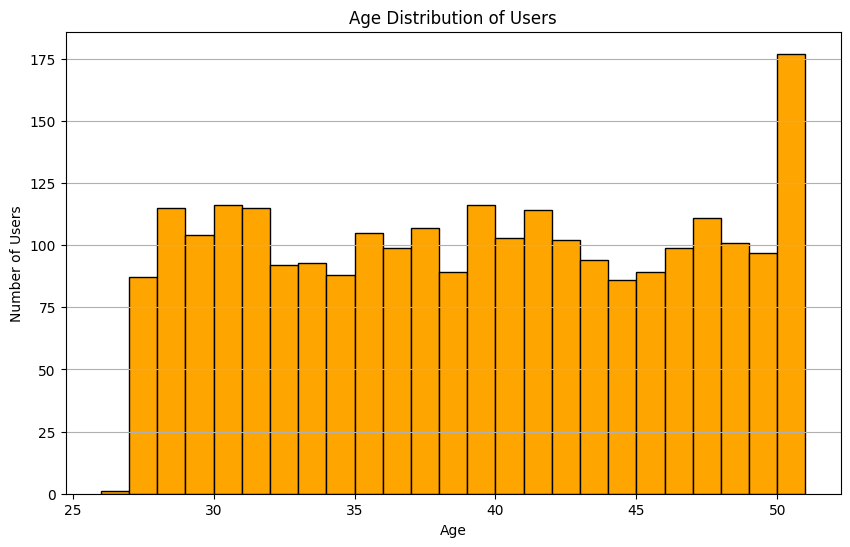

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=25, color='orange', edgecolor='black')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(axis='y')
plt.show()

The above plotted histogram shows that between age 25 to 55, there is a consistent and fair subscribers in each age group except for age 50+ which has the highest count that might mean that age 50+ users have extra free time than other age groups to spend on such stuff.

### 2. Gender Distribution

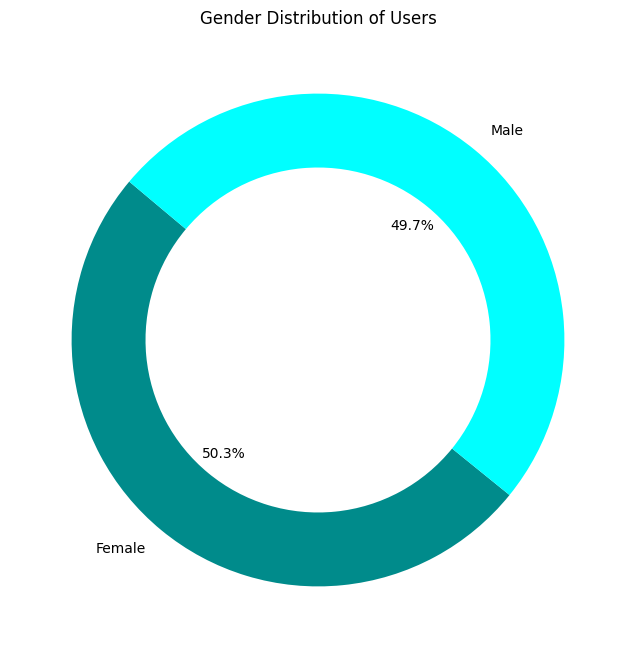

In [ ]:
gender_counts = df['Gender'].value_counts()
colors = ['darkcyan', 'cyan']

plt.figure(figsize=(12, 8))
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Gender Distribution of Users')
plt.show()

The above pie chart representation shows that, 50.3% users are of females and 49.7% users are of males. It seems like there is a pretty equal split between male and female users, it's great to see such a diverse user base enjoying their favorite shows and movies.

### 3. Country Distribution:

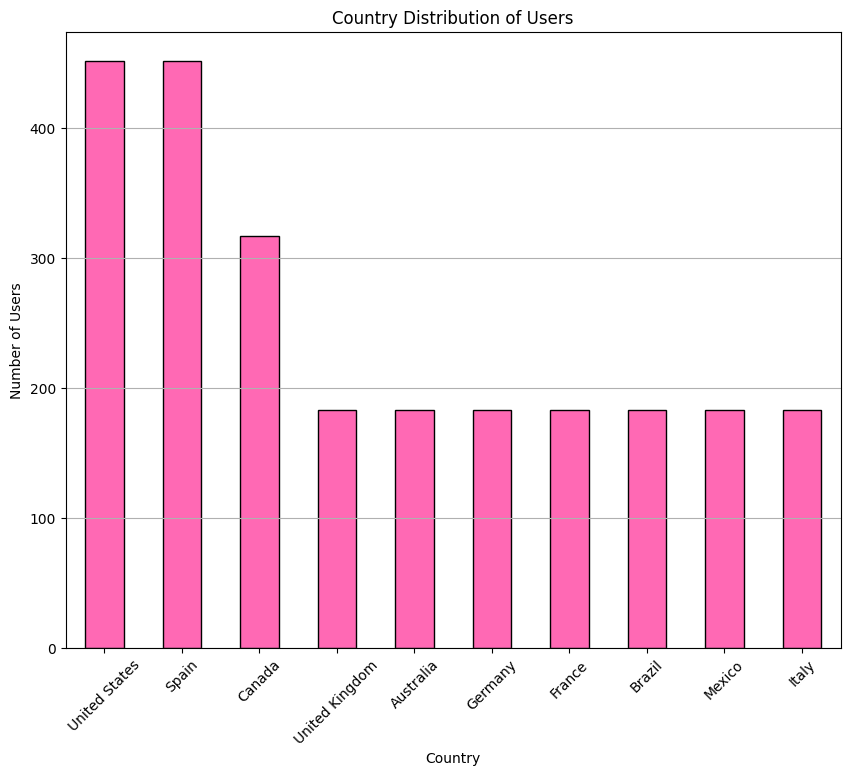

In [ ]:
country_counts = df['Country'].value_counts()

plt.figure(figsize=(10, 8))
country_counts.plot(kind='bar', color='hotpink',edgecolor='black')
plt.title('Country Distribution of Users')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The highest number of users are from US and Spain followed by Canada whereas the usage by other countries is almost consistent.

## Performing Subscription Analysis based on three characteristics:

1. Distribution of Subscription Types: A bar chart to show the number of users for each subscription type.

2. Revenue by Subscription Type: A bar chart to display the total revenue generated from each subscription type.

3. Average Monthly Revenue by Subscription Type: A bar chart to depict the average revenue per user for each subscription type.

### Distribution of Subscription Types :

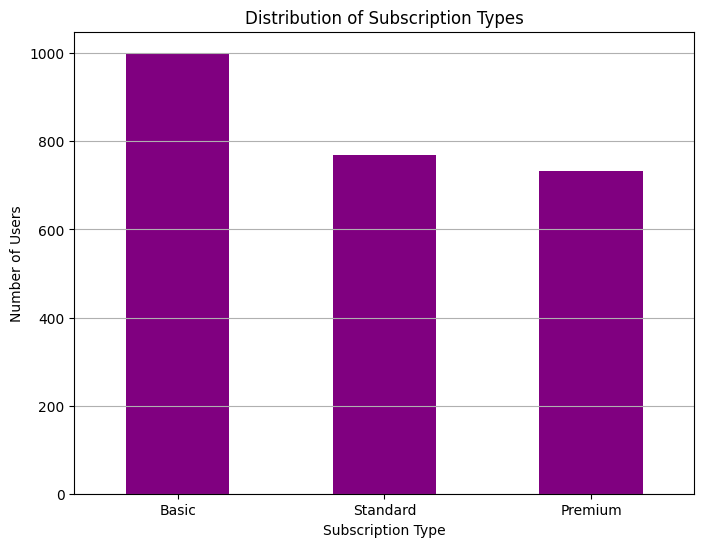

In [ ]:
subscription_counts = df['Subscription Type'].value_counts()
plt.figure(figsize=(8, 6))
subscription_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Subscription Types')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis = 'y')
plt.show()

The highest number of users opt for basic subscription.

### Total Monthly Revenue by Subscription Type:

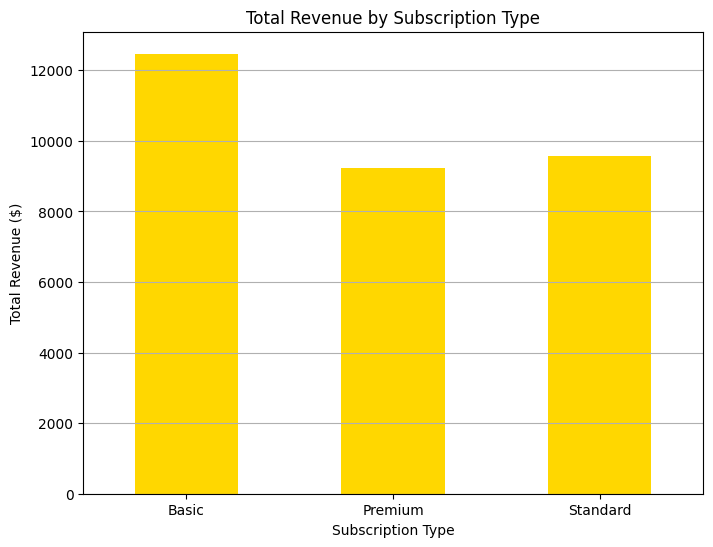

In [ ]:
revenue_by_subscription = df.groupby('Subscription Type')['Monthly Revenue'].sum()

plt.figure(figsize=(8, 6))
revenue_by_subscription.plot(kind='bar', color='gold')
plt.title('Total Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The highest revenue source is basic subscription.

### Average Monthly Revenue by Subscription Type:

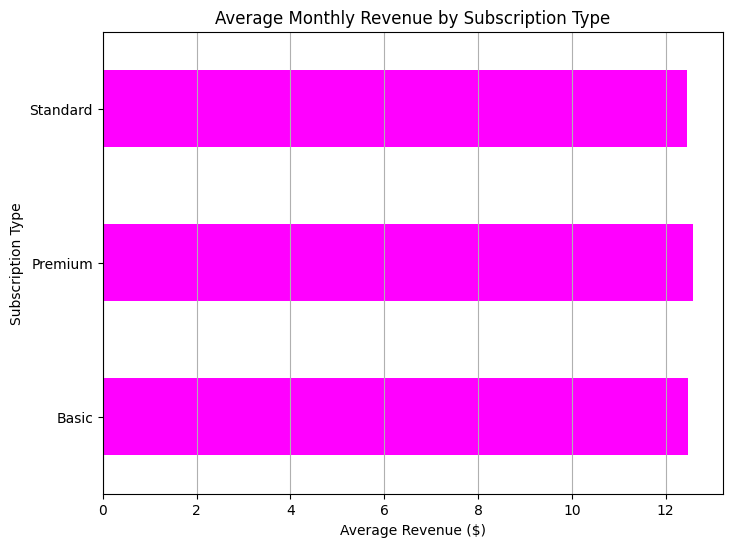

In [ ]:
average_revenue_by_subscription = df.groupby('Subscription Type')['Monthly Revenue'].mean()
plt.figure(figsize=(8, 6))
average_revenue_by_subscription.plot(kind='barh', color='magenta')
plt.title('Average Monthly Revenue by Subscription Type')
plt.ylabel('Subscription Type')
plt.xlabel('Average Revenue ($)')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.show()

The average monthly revenue from all the subscription types is almost the same.

## Performing Device Analysis based on three characteristics:

1. Distribution of Devices: A bar chart to show the number of users for each device type.

2. Device Distribution by Subscription Type: A stacked bar chart to visualize the distribution of devices across different subscription types.

3. Device Distribution by Age Groups: A bar chart to understand the preferred device of different age groups.

### 1. Distribution of Devices:

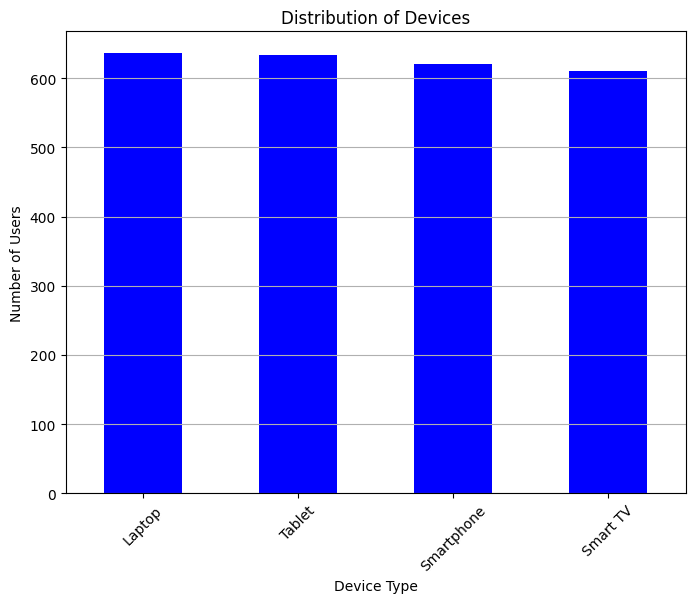

In [ ]:
device_counts = df['Device'].value_counts()

plt.figure(figsize=(8, 6))
device_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Devices')
plt.xlabel('Device Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Seems like people use all devices fairly.

### 2. Device Distribution by Subscription Type:

<Figure size 1200x700 with 0 Axes>

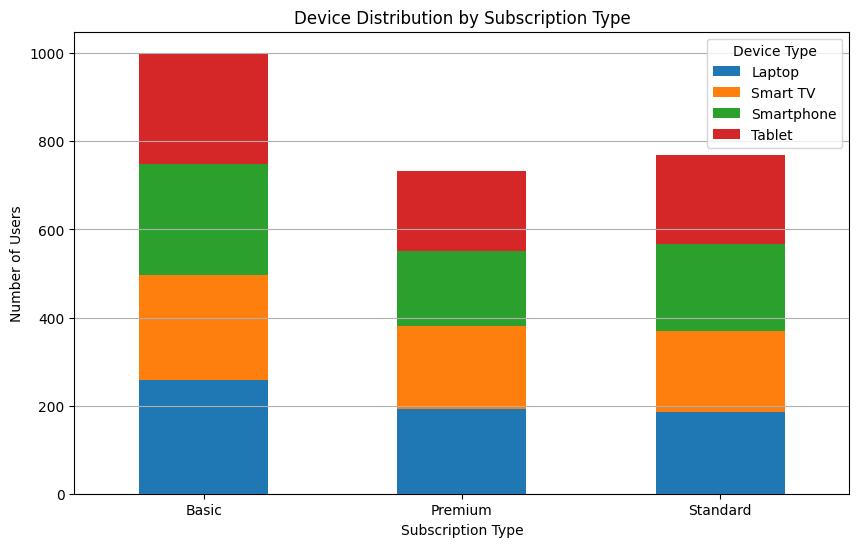

In [ ]:
device_by_subscription = df.groupby(['Subscription Type', 'Device']).size().unstack()

plt.figure(figsize=(12, 7))
device_by_subscription.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Device Distribution by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Device Type')
plt.show()

More that 700+ basic subscribers use tablets , More than 700+ premium subscribers use tablets , More than 750+ standard subscribers use tablets

### 3. Device Distribution by Age Groups:

<Figure size 1000x600 with 0 Axes>

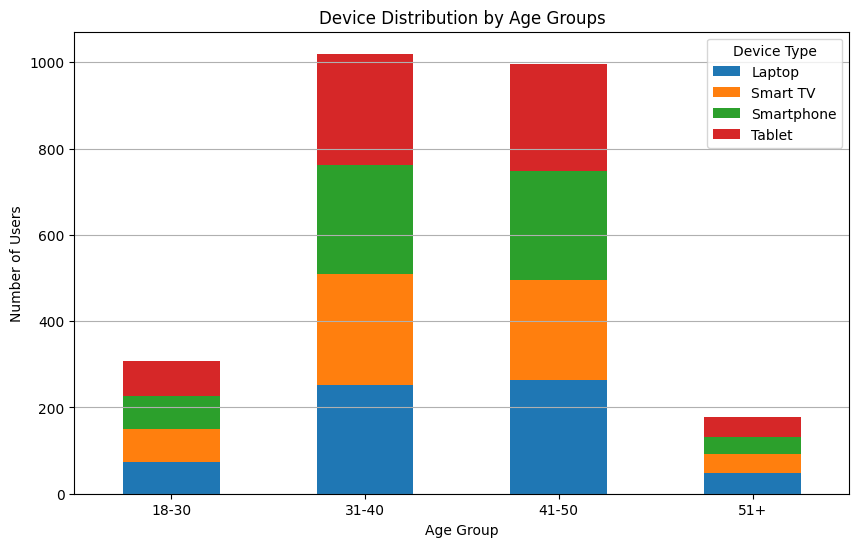

In [ ]:
# Segmenting the data into age groups
bins = [18, 30, 40, 50, 100]
labels = ["18-30", "31-40", "41-50", "51+"]
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Device Distribution by Age Groups
device_by_age = df.groupby(['Age Group', 'Device']).size().unstack()

plt.figure(figsize=(10, 6))
device_by_age.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Device Distribution by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Device Type')
plt.show()

## Performing Activity Analysis based on two characteristics:

1. User Retention: Based on the join date, we can visualize the number of users who joined Netflix over time.

3. Average Subscription Duration: Calculate the average time between the join date and the last payment date to understand user loyalty.

### 1. User Retention:

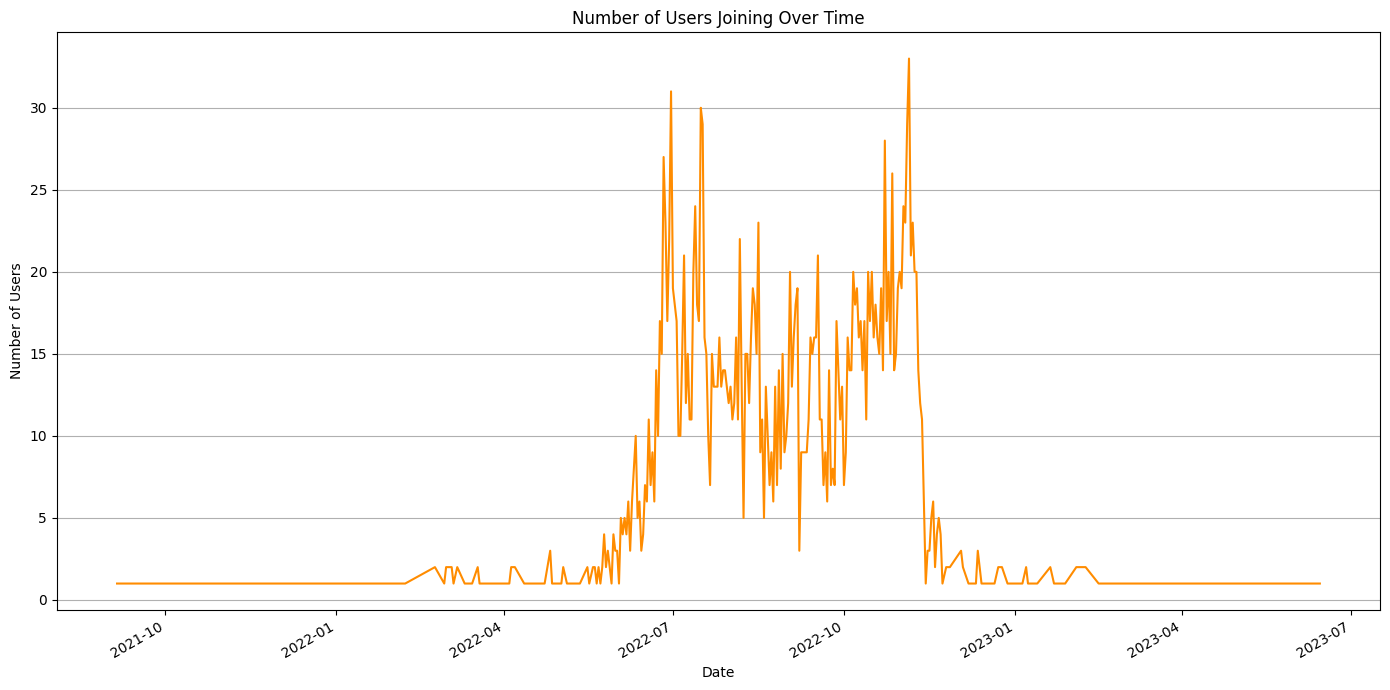

In [ ]:
# Convert 'Join Date' to datetime format
df['Join Date'] = pd.to_datetime(df['Join Date'], dayfirst=True)

# Number of users who joined over time
users_by_join_date = df['Join Date'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
users_by_join_date.plot(color='darkorange')
plt.title('Number of Users Joining Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The above graph depicts that about 30+ number of users have joined in the year of 2022.

### 3. Average Subscription Duration

In [ ]:
# Calculate the average subscription duration
df['Subscription Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days
average_subscription_duration = df['Subscription Duration'].mean()
average_subscription_duration

308.6192

## Revenue Analysis based on four characteristics:

1. Total Revenue Over Time: A line chart showcasing how revenue has evolved over time.

2. Revenue by Subscription Type: A breakdown of total revenue by subscription type.

3. Revenue by Country: A bar chart displaying the revenue generated from each country.

4. Average Revenue by Age Group: A bar chart to understand if there are any trends in revenue based on age groups.

### Total Revenue Over Time

AttributeError: ignored

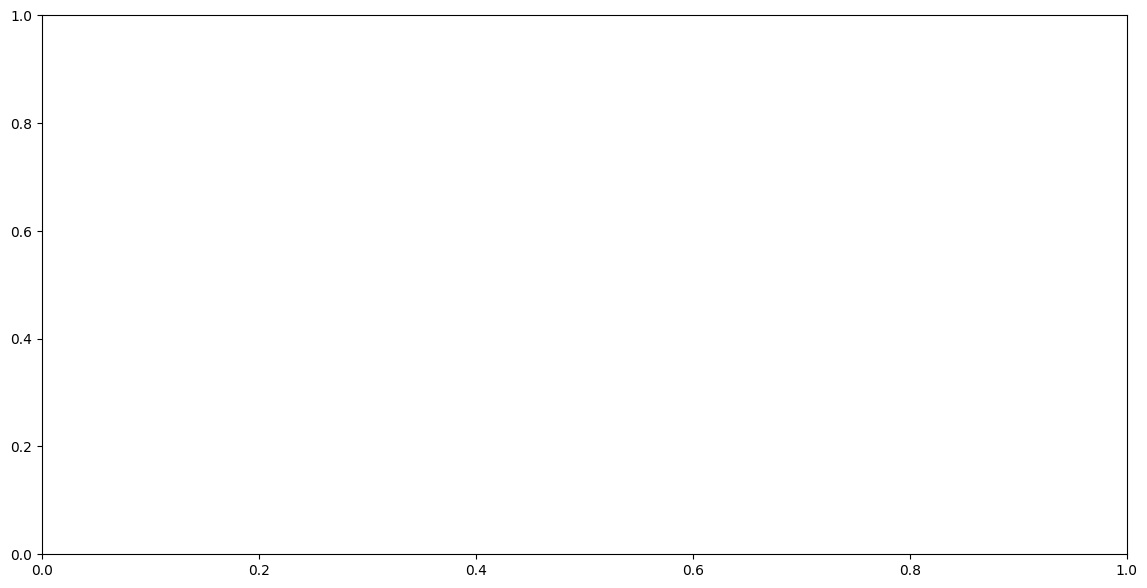

In [ ]:
#Since the dataset doesn't provide daily revenue, we'll estimate monthly revenue based on the last payment date
revenue_over_time = df.groupby('Last Payment Date')['Monthly Revenue'].sum()

plt.figure(figsize=(14, 7))
revenue_over_time.plot(color='darkgreen'')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The maximum revenue obtained about 2000 Dolars during the year of 2023.

### Revenue by Subscription Type

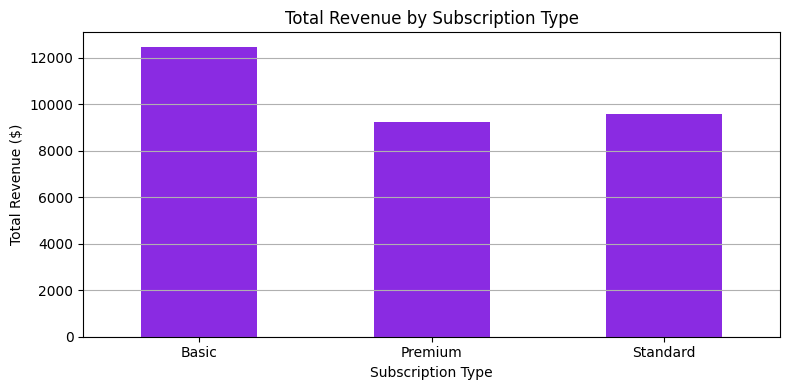

In [ ]:
revenue_by_subscription_type = df.groupby('Subscription Type')['Monthly Revenue'].sum()

plt.figure(figsize=(8, 4))
revenue_by_subscription_type.plot(kind='bar', color='blueviolet')
plt.title('Total Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The highest number of users opt for basic subscription.

### Revenue by Country

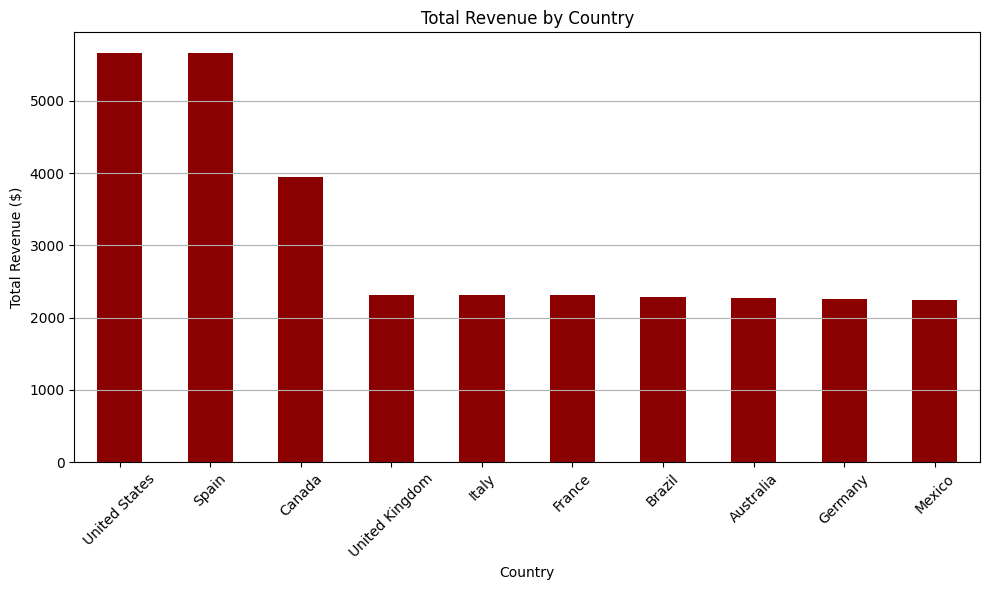

In [ ]:
revenue_by_country = df.groupby('Country')['Monthly Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
revenue_by_country.plot(kind='bar', color='darkred')
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The highest number of users are from US and Spain followed by Canada whereas the usage by other countries is almost consistent.

### Average Revenue by Age Group:

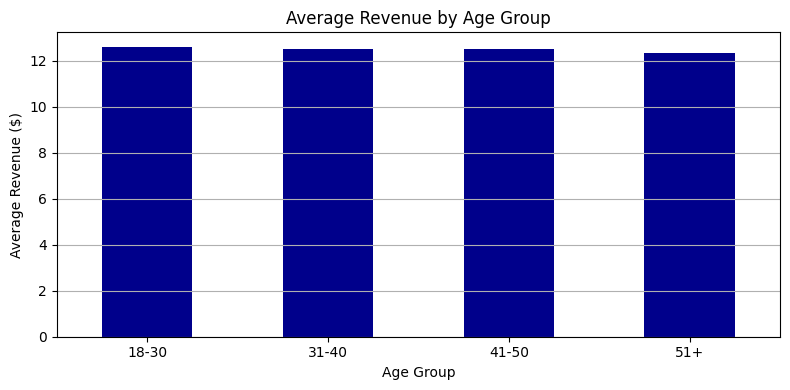

In [ ]:
average_revenue_by_age = df.groupby('Age Group')['Monthly Revenue'].mean()

plt.figure(figsize=(8, 4))
average_revenue_by_age.plot(kind='bar', color='darkblue')
plt.title('Average Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

There is equal average number of revenue obtained from all the subscribers with different age group

### Revenue by age group analysis using heat map:


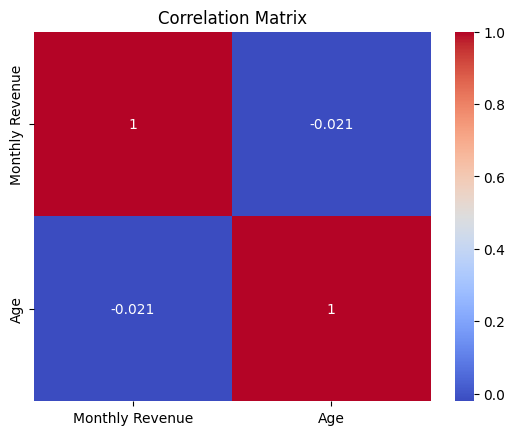

In [ ]:
import seaborn as sns
corr_matrix = df[['Monthly Revenue', 'Age']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

To train the model
Let us start by data preparation

In [1]:

import pandas as pd
import numpy as np

# Creating a synthetic dataset
np.random.seed(42)
user_ids = np.arange(1, 1001)
viewing_hours = np.random.normal(30, 10, 1000).clip(min=0)  # Average 30 hours per month
age = np.random.randint(18, 70, 1000)
subscription_type = np.random.choice(['Basic', 'Standard', 'Premium'], 1000, p=[0.3, 0.4, 0.3])
churn = np.random.choice([0, 1], 1000, p=[0.9, 0.1])  # 10% churn rate

data = pd.DataFrame({
    'user_id': user_ids,
    'viewing_hours': viewing_hours,
    'age': age,
    'subscription_type': subscription_type,
    'churn': churn
})

data.head()

,user_id,viewing_hours,age,subscription_type,churn
0,1,34.967142,61,Standard,0
1,2,28.617357,66,Basic,0
2,3,36.476885,57,Premium,0
3,4,45.230299,28,Basic,0
4,5,27.658466,20,Premium,0


Data preprocessing

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features and target variable
X = data.drop('churn', axis=1)
y = data['churn']

# Preprocessing pipeline
numerical_features = ['viewing_hours', 'age']
categorical_features = ['subscription_type']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the preprocessing pipeline
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Train the machine learning model

We'll use Random Forest classifier to predict whether a user will churn

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred)

accuracy_rf, report_rf

(0.875,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.98      0.93       179\n           1       0.00      0.00      0.00        21\n\n    accuracy                           0.88       200\n   macro avg       0.45      0.49      0.47       200\nweighted avg       0.80      0.88      0.84       200\n')

Accuracy: 0.875 (or 87.5%)
This means that the model correctly predicted the churn status of 87.5% of the test samples.

The classification report provides detailed metrics for each class (in this case, non-churned customers (0) and churned customers (1):

Precision: The ratio of true positive predictions to the total predicted positives.For class 0 (non-churned): 0.89 (89%)For class 1 (churned): 0.00 (0%)Recall: The ratio of true positive predictions to the total actual positives.For class 0 (non-churned): 0.98 (98%)For class 1 (churned): 0.00 (0%)F1-score: The harmonic mean of precision and recall, providing a balance between the two.For class 0 (non-churned): 0.93 (93%)For class 1 (churned): 0.00 (0%)Support: The number of true instances for each class in the dataset.For class 0 (non-churned): 179For class 1 (churned): 21

Results

In [11]:
print(f'Accuracy: {accuracy_rf * 100:.2f}%')
print('Classification Report:')
print(report_rf)

Accuracy: 87.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       179
           1       0.00      0.00      0.00        21

    accuracy                           0.88       200
   macro avg       0.45      0.49      0.47       200
weighted avg       0.80      0.88      0.84       200



Using a SVM model

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Model training with SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

accuracy_svm, report_svm

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.895,
 '              precision    recall  f1-score   support\n\n           0       0.90      1.00      0.94       179\n           1       0.00      0.00      0.00        21\n\n    accuracy                           0.90       200\n   macro avg       0.45      0.50      0.47       200\nweighted avg       0.80      0.90      0.85       200\n')

In [9]:
print(f'Accuracy: {accuracy_svm * 100:.2f}%')
print('Classification Report:')
print(report_svm)

Accuracy: 89.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       179
           1       0.00      0.00      0.00        21

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.80      0.90      0.85       200



Plotting the accuracies

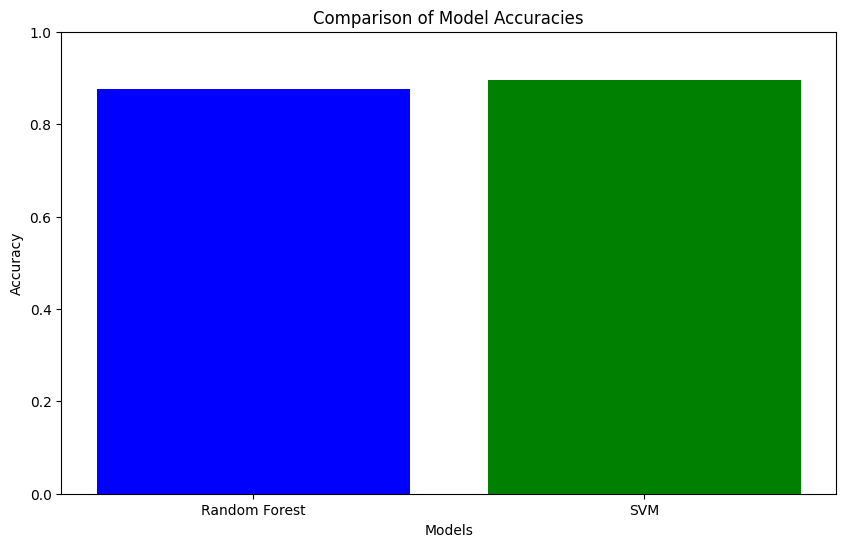

In [12]:

models = ['Random Forest', 'SVM']
accuracies = [accuracy_rf, accuracy_svm]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()

The SVM model achieved a higher accuracy of approximately 89% compared to the Random Forest model, which had an accuracy of 87%.